In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [19]:
apple_training_complete = pd.read_csv(r'AAPLe.csv')

In [20]:
len(apple_training_complete)

755

In [21]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [22]:
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [24]:
features_set = []
labels = []
for i in range(60, 755):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [25]:
features_set, labels = np.array(features_set), np.array(labels)

In [28]:
labels.shape

(695,)

In [49]:
features_set = np.reshape(features_set, (features_set.shape[0], 1, features_set.shape[1]))

In [50]:
features_set.shape

(695, 1, 60)

In [51]:
features_set

array([[[0.03176831, 0.03029184, 0.03181753, ..., 0.08346867,
         0.07916235, 0.08708598]],

       [[0.03029184, 0.03181753, 0.03260495, ..., 0.07916235,
         0.08708598, 0.08521582]],

       [[0.03181753, 0.03260495, 0.03767409, ..., 0.08708598,
         0.08521582, 0.08199225]],

       ...,

       [[0.54129146, 0.568089  , 0.57456078, ..., 0.8367046 ,
         0.81426256, 0.83946063]],

       [[0.568089  , 0.57456078, 0.56848273, ..., 0.81426256,
         0.83946063, 0.82646786]],

       [[0.57456078, 0.56848273, 0.57278904, ..., 0.83946063,
         0.82646786, 0.78945815]]])

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [53]:
model = Sequential()

In [54]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [55]:
model.add(Dense(units = 1))

In [56]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['acc'])

In [57]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
695/695 [==============================] - 2s 2ms/step - loss: 0.0760 - acc: 0.0014
Epoch 2/100
695/695 [==============================] - 0s 186us/step - loss: 0.0133 - acc: 0.0029
Epoch 3/100
695/695 [==============================] - 0s 181us/step - loss: 0.0072 - acc: 0.0029
Epoch 4/100
695/695 [==============================] - 0s 186us/step - loss: 0.0051 - acc: 0.0029
Epoch 5/100
695/695 [==============================] - 0s 201us/step - loss: 0.0052 - acc: 0.0029
Epoch 6/100
695/695 [==============================] - 0s 197us/step - loss: 0.0050 - acc: 0.0029
Epoch 7/100
695/695 [==============================] - 0s 209us/step - loss: 0.0040 - acc: 0.0029
Epoch 8/100
695/695 [==============================] - 0s 196us/step - loss: 0.0035 - acc: 0.0029
Epoch 9/100
695/695 [==============================] - 0s 207us/step - loss: 0.0032 - acc: 0.0029
Epoch 10/100
695/695 [==============================] - 0s 210us/step - loss: 0.0032 - acc: 0.0029
Epoch 11/100
695/695 

In [58]:
apple_testing_complete = pd.read_csv(r'AAPLe.csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

In [59]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

In [60]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

In [61]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [62]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [66]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], 1,test_features.shape[1]))

In [67]:
predictions = model.predict(test_features)

In [68]:
predictions = scaler.inverse_transform(predictions)

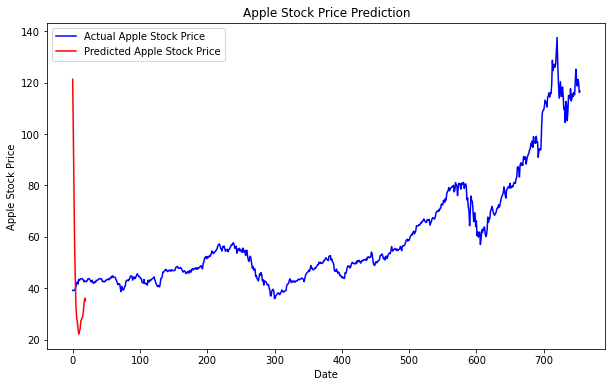

In [69]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()